In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [ ]:
#reading the Spring Oppty Data
df = pd.read_excel('Spring_Oppty_Data.xlsx')
df.head()

,Opportunity ID,Transition To Stage,Transition To Timestamp,Transition From Stage Name,Transition From Timestamp,Customer Name,Risk Status,Creation Date,Decision Date,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application
0,5,Stage 3,20150211130001,NaN,NaN,Customer 83,NaN,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
1,5,Stage 3,20150213050002,Stage 3,2.015021e+13,Customer 83,NaN,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
2,5,Stage 3,20150218210007,Stage 3,2.015021e+13,Customer 83,NaN,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
3,5,Stage 3,20150304210002,Stage 3,2.015022e+13,Customer 83,NaN,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
4,5,Stage 3,20150304210002,Stage 3,2.015030e+13,Customer 83,NaN,2015-02-11,2015-03-12,Open,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4


In [ ]:
#imputing null values of Transition From Stage Name with Transition to stage column values 
df['Transition From Stage Name'].fillna(df['Transition To Stage'],inplace=True)
#imputing null values of Transition From Timestamp with Transition to Timestamp column values 
df['Transition From Timestamp'].fillna(df['Transition To Timestamp'],inplace=True)
df.head()

,Opportunity ID,Transition To Stage,Transition To Timestamp,Transition From Stage Name,Transition From Timestamp,Customer Name,Risk Status,Creation Date,Decision Date,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application
0,5,Stage 3,20150211130001,Stage 3,2.015021e+13,Customer 83,NaN,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
1,5,Stage 3,20150213050002,Stage 3,2.015021e+13,Customer 83,NaN,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
2,5,Stage 3,20150218210007,Stage 3,2.015021e+13,Customer 83,NaN,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
3,5,Stage 3,20150304210002,Stage 3,2.015022e+13,Customer 83,NaN,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
4,5,Stage 3,20150304210002,Stage 3,2.015030e+13,Customer 83,NaN,2015-02-11,2015-03-12,Open,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4


In [ ]:
df['Transition From Timestamp'] = df['Transition From Timestamp'].apply(lambda x: '%.f' % x)

In [ ]:
df.dtypes

Opportunity ID                         int64
Transition To Stage                   object
Transition To Timestamp                int64
Transition From Stage Name            object
Transition From Timestamp             object
Customer Name                         object
Risk Status                           object
Creation Date                 datetime64[ns]
Decision Date                 datetime64[ns]
Opportunity Status                    object
Opportunity Type                      object
Core Consumption Market               object
Core Product Segment                  object
Core Sales Segment                    object
Geography                             object
Core Product Application              object
dtype: object

Total Count
313571
Total NA
200380


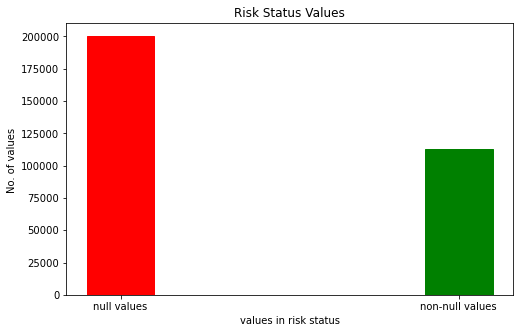

,Opportunity ID,Transition To Stage,Transition To Timestamp,Transition From Stage Name,Transition From Timestamp,Customer Name,Creation Date,Decision Date,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application
0,5,Stage 3,20150211130001,Stage 3,20150211130001,Customer 83,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
1,5,Stage 3,20150213050002,Stage 3,20150211130001,Customer 83,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
2,5,Stage 3,20150218210007,Stage 3,20150213050002,Customer 83,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
3,5,Stage 3,20150304210002,Stage 3,20150218210007,Customer 83,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4
4,5,Stage 3,20150304210002,Stage 3,20150304210002,Customer 83,2015-02-11,2015-03-12,Open,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo NA,Prd App 4


In [ ]:
#Risk status column dropped as it contains mostly NA values
print("Total Count")
print(df['Risk Status'].shape[0])
print("Total NA")
print(df['Risk Status'].isnull().sum())

#plotting risk status graph
data ={'null values': df['Risk Status'].isnull().sum(),'non-null values':df['Risk Status'].value_counts().sum()}
x_axis_risk=list(data.keys())
y_axis_risk=list(data.values())

fig = plt.figure(figsize = (8, 5))

barlist=plt.bar(x_axis_risk,y_axis_risk,
        width = 0.2)
barlist[0].set_color('red')
barlist[1].set_color('g')
 
plt.xlabel("values in risk status")
plt.ylabel("No. of values ")
plt.title("Risk Status Values")
plt.show()

df.drop(['Risk Status'], axis  = 1, inplace = True)
df.head()

In [ ]:
#imputing geography column with corresponding values
for i in df['Opportunity ID'].unique():
    df2 = df[df['Opportunity ID']==i]
    Geofill = 'NA'
    for j in df2.index:
        if df2['Geography'][j] != 'Geo 1' and  df2['Geography'][j] != 'Geo NA':
            Geofill = df2['Geography'][j]
            break
    df.loc[df2.index,'Geography'] = Geofill
    

    
df.head()

,Opportunity ID,Transition To Stage,Transition To Timestamp,Transition From Stage Name,Transition From Timestamp,Customer Name,Creation Date,Decision Date,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application
0,5,Stage 3,20150211130001,Stage 3,20150211130001,Customer 83,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
1,5,Stage 3,20150213050002,Stage 3,20150211130001,Customer 83,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
2,5,Stage 3,20150218210007,Stage 3,20150213050002,Customer 83,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
3,5,Stage 3,20150304210002,Stage 3,20150218210007,Customer 83,2015-02-11,2015-03-12,NaN,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
4,5,Stage 3,20150304210002,Stage 3,20150304210002,Customer 83,2015-02-11,2015-03-12,Open,NaN,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4


In [ ]:
#imputing Opportunity Type column with corresponding values
for i in df['Opportunity ID'].unique():
    df2 = df[df['Opportunity ID']==i]
    OTfill = 'nan'
    for j in df2.index:
        if df2['Opportunity Type'][j] == 'Design' or df2['Opportunity Type'][j] == 'Deal' :
            OTfill = df2['Opportunity Type'][j]
            break
    df.loc[df2.index,'Opportunity Type'] = OTfill
    
df.head()

,Opportunity ID,Transition To Stage,Transition To Timestamp,Transition From Stage Name,Transition From Timestamp,Customer Name,Creation Date,Decision Date,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application
0,5,Stage 3,20150211130001,Stage 3,20150211130001,Customer 83,2015-02-11,2015-03-12,NaN,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
1,5,Stage 3,20150213050002,Stage 3,20150211130001,Customer 83,2015-02-11,2015-03-12,NaN,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
2,5,Stage 3,20150218210007,Stage 3,20150213050002,Customer 83,2015-02-11,2015-03-12,NaN,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
3,5,Stage 3,20150304210002,Stage 3,20150218210007,Customer 83,2015-02-11,2015-03-12,NaN,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
4,5,Stage 3,20150304210002,Stage 3,20150304210002,Customer 83,2015-02-11,2015-03-12,Open,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4


In [ ]:
#Making Decision Date common for an opportunity
for i in df['Opportunity ID'].unique():
    df2 = df[df['Opportunity ID'] == i]
    df2.reset_index(inplace = True)
    date = df2['Decision Date'][len(df2)-1]
    df2 = df[df['Opportunity ID'] == i]
    df.loc[df2.index,'Decision Date'] = date
    

In [ ]:
#Changing the format of timestamp column to date-time format
df['Transition To Timestamp'] = pd.to_datetime(df['Transition To Timestamp'], format = '%Y%m%d%H%M%S')
df['Transition From Timestamp'] = pd.to_datetime(df['Transition From Timestamp'], format = '%Y%m%d%H%M%S')
df.head()


,Opportunity ID,Transition To Stage,Transition To Timestamp,Transition From Stage Name,Transition From Timestamp,Customer Name,Creation Date,Decision Date,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application
0,5,Stage 3,2015-02-11 13:00:01,Stage 3,2015-02-11 13:00:01,Customer 83,2015-02-11,2015-03-12,NaN,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
1,5,Stage 3,2015-02-13 05:00:02,Stage 3,2015-02-11 13:00:01,Customer 83,2015-02-11,2015-03-12,NaN,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
2,5,Stage 3,2015-02-18 21:00:07,Stage 3,2015-02-13 05:00:02,Customer 83,2015-02-11,2015-03-12,NaN,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
3,5,Stage 3,2015-03-04 21:00:02,Stage 3,2015-02-18 21:00:07,Customer 83,2015-02-11,2015-03-12,NaN,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
4,5,Stage 3,2015-03-04 21:00:02,Stage 3,2015-03-04 21:00:02,Customer 83,2015-02-11,2015-03-12,Open,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4


{'Stage 3': 131964, 'Stage 4': 857018, 'Stage 5': 138395, 'Stage 9': 39725, 'Stage 2': 120977, 'Stage 6': 120929, 'Stage 1': 92806, 'Stage 8': 37755, 'Stage 7': 0}


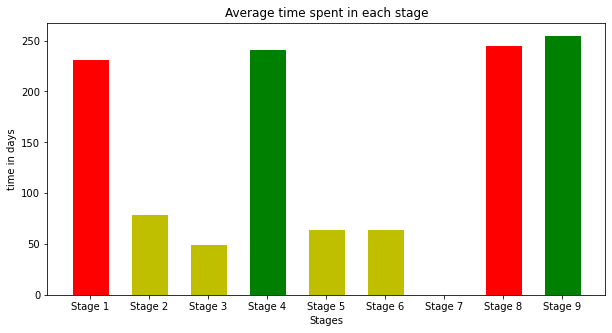

In [ ]:
#calculating total time for each stage 
cal_total_time = dict()
for i in df['Transition To Stage'].unique():
    df2=df[df['Transition To Stage']==i]
    ls = []
    key_tt = i
    for j in df2['Opportunity ID'].unique():
        df3 = df2[df2['Opportunity ID']==j]
        x = 1
        df3.reset_index(inplace=True)
        for k in df3.index:
            if x == len(df3): 
              continue
            ls.append( (df3['Transition To Timestamp'][k+1]- df3['Transition To Timestamp'][k]).days)
            x = x+1
    cal_total_time[key_tt] = sum(ls)
print(cal_total_time)

#dict() which contains no. of opportunities each stage has been
count_dic={'Stage 3': 2689, 'Stage 4': 3556, 'Stage 5': 2157, 'Stage 9': 156, 'Stage 2': 1534, 'Stage 6': 1897, 'Stage 1': 401, 'Stage 8': 154, 'Stage 7': 1}
count_dic

#dict() which contains avg time taken in each stage
total_avg_time=dict()
total_avg_time={'Stage 3':49.075,'Stage 4':241,'Stage 5':64.16,'Stage 9':254.65,'Stage 2':78.86,'Stage 6':63.75,'Stage 1':231.44,'Stage 8':245.16,'Stage 7':0}

#plotting average time spent in each stage 
total_avg_time={'Stage 1':231.44,'Stage 2':78.86,'Stage 3':49.075,'Stage 4':241,'Stage 5':64.16,'Stage 6':63.75,'Stage 7':0,'Stage 8':245.16,'Stage 9':254.65}
x_axis_risk=list(total_avg_time.keys())
y_axis_risk=list(total_avg_time.values())

fig = plt.figure(figsize = (10, 5))

barlist=plt.bar(x_axis_risk,y_axis_risk,width = 0.6)
barlist[0].set_color('r')
barlist[1].set_color('y')
barlist[2].set_color('y')
barlist[3].set_color('g')
barlist[4].set_color('y')
barlist[5].set_color('y')
barlist[6].set_color('y')
barlist[7].set_color('r')
barlist[8].set_color('g')

 
plt.xlabel("Stages")
plt.ylabel("time in days")
plt.title("Average time spent in each stage")
plt.show()

In [ ]:
#Dropping duplicate and unnecessray rows
Pre_ID = 0
ls = []
for i in df.index:
    if Pre_ID != df['Opportunity ID'][i]:
        Pre_stage = df['Transition To Stage'][i]
        Pre_ID = df['Opportunity ID'][i]
        continue
    elif Pre_stage != df['Transition To Stage'][i]:
        Pre_stage = df['Transition To Stage'][i]
        continue
    else:
        ls.append(i)
   

df.drop(labels = ls, axis = 0, inplace = True)
df.reset_index(inplace = True)
df.head()

,index,Opportunity ID,Transition To Stage,Transition To Timestamp,Transition From Stage Name,Transition From Timestamp,Customer Name,Creation Date,Decision Date,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application
0,0,5,Stage 3,2015-02-11 13:00:01,Stage 3,2015-02-11 13:00:01,Customer 83,2015-02-11,2015-03-12,NaN,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
1,5,5,Stage 4,2015-03-16 13:00:01,Stage 3,2015-03-04 21:00:02,Customer 83,2015-02-11,2015-03-12,Closed/Won,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
2,102,19,Stage 4,2015-02-11 13:00:01,Stage 4,2015-02-11 13:00:01,Customer 216,2015-02-11,2015-08-14,NaN,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 5,Prd App 13
3,104,19,Stage 5,2015-02-15 21:00:06,Stage 4,2015-02-15 05:00:01,Customer 216,2015-02-11,2015-08-14,NaN,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 5,Prd App 13
4,125,19,Stage 4,2015-08-18 13:00:02,Stage 5,2015-08-10 18:37:57,Customer 216,2015-02-11,2015-08-14,Closed/Won,Design,Core Market 16,Core Prd Seg 3,Sales Segment 1,Geo 5,Prd App 13


In [ ]:
#Giving Opportunity Status according to corresponding stage
for i in df.index:
  if (df.loc[i]['Transition To Stage']=='Stage 4' or df.loc[i]['Transition To Stage']=='Stage 9')and (pd.isnull(df['Opportunity Status'][i])):
    df['Opportunity Status'][i]='Closed/Won'
  elif (df.loc[i]['Transition To Stage']=='Stage 1' or df.loc[i]['Transition To Stage']=='Stage 8') and (pd.isnull(df['Opportunity Status'][i])):
    df['Opportunity Status'][i]='Closed/Lost'
  elif (pd.isnull(df['Opportunity Status'][i])):
    df['Opportunity Status'][i]='Open'
  else:
    continue

df.head()

C:\Users\GAURAV~1.KHA\AppData\Local\Temp/ipykernel_7528/2468736624.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Opportunity Status'][i]='Open'
C:\Users\GAURAV~1.KHA\AppData\Local\Temp/ipykernel_7528/2468736624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Opportunity Status'][i]='Closed/Won'
C:\Users\GAURAV~1.KHA\AppData\Local\Temp/ipykernel_7528/2468736624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Op

,index,Opportunity ID,Transition To Stage,Transition To Timestamp,Transition From Stage Name,Transition From Timestamp,Customer Name,Creation Date,Decision Date,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application
0,0,5,Stage 3,2015-02-11 13:00:01,Stage 3,2015-02-11 13:00:01,Customer 83,2015-02-11,2015-03-12,Open,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
1,5,5,Stage 4,2015-03-16 13:00:01,Stage 3,2015-03-04 21:00:02,Customer 83,2015-02-11,2015-03-12,Closed/Won,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4
2,102,19,Stage 4,2015-02-11 13:00:01,Stage 4,2015-02-11 13:00:01,Customer 216,2015-02-11,2015-08-14,Closed/Won,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 5,Prd App 13
3,104,19,Stage 5,2015-02-15 21:00:06,Stage 4,2015-02-15 05:00:01,Customer 216,2015-02-11,2015-08-14,Open,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 5,Prd App 13
4,125,19,Stage 4,2015-08-18 13:00:02,Stage 5,2015-08-10 18:37:57,Customer 216,2015-02-11,2015-08-14,Closed/Won,Design,Core Market 16,Core Prd Seg 3,Sales Segment 1,Geo 5,Prd App 13


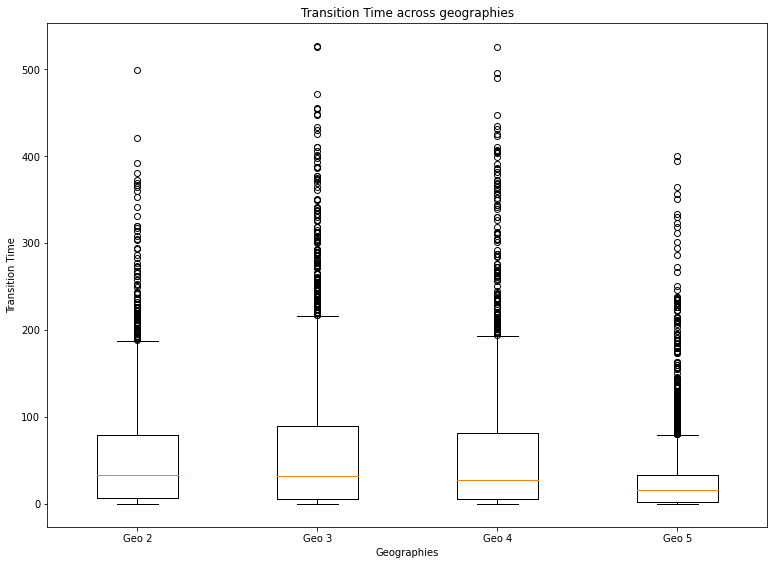

In [ ]:
#time taken between stage transitions across geographies
Transition_time = dict()
for i in df['Geography'].unique():
    df2 = df[df['Geography']==i]
    ls = []
    key_ = i
    for j in df2['Opportunity ID'].unique():
        df3 = df2[df2['Opportunity ID']==j]
        x = 1
        for k in df3.index:
            if x == len(df3):
                continue
            ls.append( (df3['Transition From Timestamp'][k+1]-df3['Transition To Timestamp'][k]).days)
            x = x+1
    Transition_time[key_] = ls
    
 
#plotting transition across geographies 
data=[Transition_time['Geo 2'],Transition_time['Geo 3'],Transition_time['Geo 4'],Transition_time['Geo 5']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data,labels=['Geo 2','Geo 3','Geo 4','Geo 5'])
plt.ylabel("Transition Time")
plt.xlabel("Geographies")
plt.title("Transition Time across geographies")

plt.show()



In [ ]:
#two-sided t test btw geo 2 and geo 4
ls3 = Transition_time['Geo 4']
ls2 = Transition_time['Geo 2']
t, p = ttest_ind(ls2, ls3, equal_var=True)
p

0.49405854975789487

In [ ]:
#two-sided t test btw geo 5 and geo 2
ls4 = Transition_time['Geo 5']
ls2 = Transition_time['Geo 2']
t, p = ttest_ind(ls4, ls2, equal_var=True)
p

2.0138566785670993e-53

In [ ]:
#two-sided t test btw geo 3 and geo 4
ls1 = Transition_time['Geo 3']
ls3 = Transition_time['Geo 4']
t, p = ttest_ind(ls1, ls3, equal_var=True)
p

0.37989605297521

In [ ]:
#two-sided t test btw geo 3 and geo 5
ls1 = Transition_time['Geo 3']
ls4 = Transition_time['Geo 5']
t, p = ttest_ind(ls4, ls1, equal_var=True)
p

2.1389237640125028e-75

In [ ]:
#two-sided t test btw geo 4 and geo 5
ls3 = Transition_time['Geo 4']
ls4 = Transition_time['Geo 5']
t, p = ttest_ind(ls4, ls3, equal_var=True)
p

2.0170422323119794e-55

In [ ]:
#one sided t test btw geo 5 and geo 4
ls3 = Transition_time['Geo 4']
ls4 = Transition_time['Geo 5']
t, p = ttest_ind(ls3, ls4, equal_var=True,alternative='greater')
p

1.0085211161559897e-55

In [ ]:
#one sided t test btw geo 5 and geo 3
ls1 = Transition_time['Geo 3']
ls4 = Transition_time['Geo 5']
t, p = ttest_ind(ls1, ls4, equal_var=True,alternative='greater')
p

1.0694618820062514e-75

In [ ]:
#one sided t test btw geo 5 and geo 2
ls4 = Transition_time['Geo 5']
ls2 = Transition_time['Geo 2']
t, p = ttest_ind(ls2, ls4, equal_var=True,alternative='greater')
p

1.0069283392835496e-53

Early Loss
242
Late Loss
293


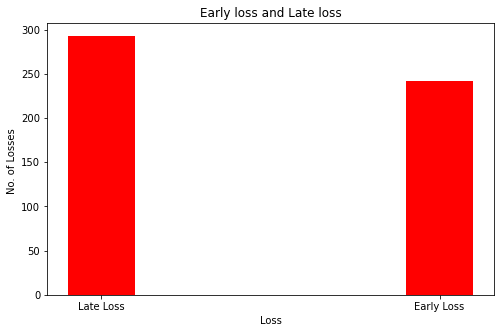

In [ ]:
#calculating late losses and early losses
Early_loss = 0
Late_loss = 0

for i in df['Opportunity ID'].unique():
    df2 = df[df['Opportunity ID']==i]
    df2.reset_index(inplace = True)
    if df2['Transition To Stage'][len(df2)-1] == 'Stage 1' or df2['Transition To Stage'][len(df2)-1] == 'Stage 8':
        if df2['Transition From Stage Name'][len(df2)-1] == 'Stage 5' or df2['Transition From Stage Name'][len(df2)-1] == 'Stage 6':
            Early_loss = Early_loss + 1
          
        else :
            Late_loss = Late_loss + 1
            
print('Early Loss')
print(Early_loss)
print('Late Loss')
print(Late_loss)

#plotting late loss and early loss
data ={'Late Loss':Late_loss,'Early Loss':Early_loss}
x_axis_loss=list(data.keys())
y_axis_loss=list(data.values())

fig = plt.figure(figsize = (8, 5))

plt.bar(x_axis_loss,y_axis_loss, color ='red',
        width = 0.2)
 
plt.xlabel("Loss")
plt.ylabel("No. of Losses ")
plt.title("Early loss and Late loss")
plt.show()

{'Core Prd Seg 3': 0.688965238480194, 'Core Prd Seg 4': 0.4010416666666667, 'Core Prd Seg 5': 0.31868131868131866, 'Core Prd Seg 8': 0.28888888888888886, 'Core Prd Seg 2': 0.125, 'Core Prd Seg 7': 0.14285714285714285, 'Core Prd Seg 6': 0.26666666666666666, 'Core Prd Seg 9': 0.2, 'Core Prd Seg 1': 0.0, 'Core Prd Seg 10': 0.0, 'Core Prd Seg 11': 0.0}


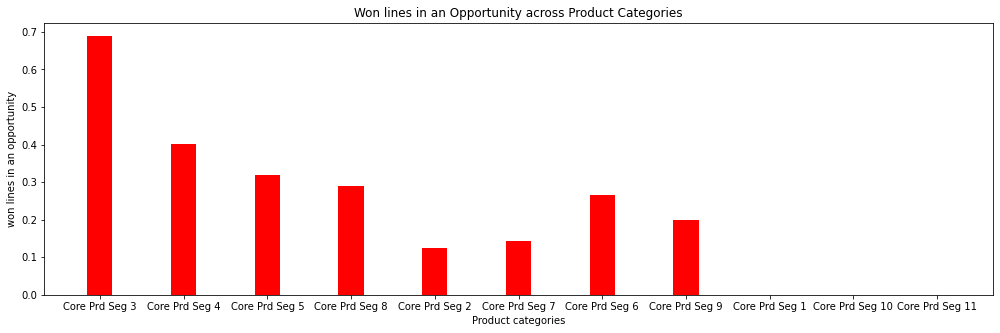

In [ ]:
#calculating the proportion of Won lines in an Opportunity across Product Categories
Total_opportunity_status = dict()
for i in df['Core Product Segment'].unique():
    df2 = df[df['Core Product Segment'] == i]
    Won = 0
    Loss = 0
    Open = 0
    for j in df2['Opportunity ID'].unique():
        df3  = df2[df2['Opportunity ID'] == j]
        df3.reset_index(inplace = True)
        if df3['Opportunity Status'][len(df3)-1] == 'Closed/Won':
            Won = Won + 1
        elif df3['Opportunity Status'][len(df3)-1] == 'Closed/Lost':
            Loss = Loss +1
        else:
            Open = Open +1
    Total_opportunity_status[i] = [Won, Loss, Open]
    
#creating a dict() for won lines in an opportunity across product categories
core_prod_dic=dict()
for i in df['Core Product Segment'].unique():
  key_=i
  value_=Total_opportunity_status[i][0]/sum(Total_opportunity_status[i])
  core_prod_dic[key_]=value_

print(core_prod_dic)


#plotting Won lines in an Opportunity across Product Categories
x_axis_risk=list(core_prod_dic.keys())
y_axis_risk=list(core_prod_dic.values())

fig = plt.figure(figsize = (17, 5))

plt.bar(x_axis_risk,y_axis_risk, color ='red',
        width = 0.3)
 
plt.xlabel("Product categories")
plt.ylabel("won lines in an opportunity")
plt.title("Won lines in an Opportunity across Product Categories")
plt.show()

In [ ]:
#Creating df_product from product data
df_product = pd.read_excel('springboard_illst_prd_dat.xlsx')
df_product.head()

,Opportunity ID,Product ID,Product Segment Name,Product Status,Product $,Product Quantity,Decision Date,Snapshot Time
0,1361,6669,Product Segment NA,Win Approved,0,1,2015-08-12,20151125050002
1,1361,6669,Product Segment NA,Win Approved,0,1,2015-08-12,20151025050002
2,1361,6669,Product Segment NA,Win Approved,0,1,2015-08-12,20160105050003
3,1361,6669,Product Segment NA,Win Approved,0,1,2015-08-12,20160101050003
4,1361,6669,Product Segment NA,Pending,0,1,2015-08-31,20150525050003


In [ ]:
#Dropping Product Segment Name column
print(df_product['Product Segment  Name'].value_counts())
df_product.drop(['Product Segment  Name'], axis = 1, inplace = True)
df_product.head()


Product Segment NA    142431
Name: Product Segment  Name, dtype: int64


,Opportunity ID,Product ID,Product Status,Product $,Product Quantity,Decision Date,Snapshot Time
0,1361,6669,Win Approved,0,1,2015-08-12,20151125050002
1,1361,6669,Win Approved,0,1,2015-08-12,20151025050002
2,1361,6669,Win Approved,0,1,2015-08-12,20160105050003
3,1361,6669,Win Approved,0,1,2015-08-12,20160101050003
4,1361,6669,Pending,0,1,2015-08-31,20150525050003


In [ ]:
#Dropping NA from df_product
print(df_product['Product Status'].unique())
df_product.dropna()

['Win Approved' 'Pending' 'Win Submitted' 'Cancelled' 'Deleted' 'Lost' nan]


,Opportunity ID,Product ID,Product Status,Product $,Product Quantity,Decision Date,Snapshot Time
0,1361,6669,Win Approved,0,1,2015-08-12,20151125050002
1,1361,6669,Win Approved,0,1,2015-08-12,20151025050002
2,1361,6669,Win Approved,0,1,2015-08-12,20160105050003
3,1361,6669,Win Approved,0,1,2015-08-12,20160101050003
4,1361,6669,Pending,0,1,2015-08-31,20150525050003
...,...,...,...,...,...,...,...
142426,28546,45808,Pending,327600,2800,2016-07-27,20160110050005
142427,28546,45808,Pending,327600,2800,2016-07-27,20160109130003
142428,28550,45810,Pending,192000,1000,2016-01-29,20160109130003
142429,28551,45792,Pending,160000,2500,2016-03-31,20160110050005


In [ ]:
#Dropping duplicate and unnecessary rows
ls = []
for i in df_product['Opportunity ID'].unique():
    df2 = df_product[df_product['Opportunity ID'] == i]
    for j in df2['Product ID'].unique():
        df3 = df2[df2['Product ID'] == j]
        ind = -1
        for k in df3.index:
            if df3['Product Status'][k] != 'Pending':
                ind = k
                break
        if ind == -1:
            ind = k
        ls.append(k)


df_product = df_product.loc[ls]
len(df_product)

4384

In [ ]:
#Changing snapshot time format to date-time format
df_product['Snapshot Time'] = pd.to_datetime(df_product['Snapshot Time'], format = '%Y%m%d%H%M%S')
df_product.head()

,Opportunity ID,Product ID,Product Status,Product $,Product Quantity,Decision Date,Snapshot Time
0,1361,6669,Win Approved,0,1,2015-08-12,2015-11-25 05:00:02
120,1363,6756,Pending,0,1,2015-04-15,2015-06-01 14:02:36
121,1364,6659,Win Approved,0,1,2015-07-19,2016-01-05 05:00:03
122,1364,6660,Win Approved,0,1,2015-07-19,2015-11-01 21:00:02
242,5,404,Win Approved,230400,1200,2015-03-16,2016-01-01 05:00:03


In [ ]:
#Creating a new column of 'month_year_Decision' from 'Decision Date' in opportunity data df for merging
df['month_year_Decision'] = pd.to_datetime(df['Decision Date']).dt.to_period('M')
df.head()

,index,Opportunity ID,Transition To Stage,Transition To Timestamp,Transition From Stage Name,Transition From Timestamp,Customer Name,Creation Date,Decision Date,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application,month_year_Decision
0,0,5,Stage 3,2015-02-11 13:00:01,Stage 3,2015-02-11 13:00:01,Customer 83,2015-02-11,2015-03-12,Open,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4,2015-03
1,5,5,Stage 4,2015-03-16 13:00:01,Stage 3,2015-03-04 21:00:02,Customer 83,2015-02-11,2015-03-12,Closed/Won,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4,2015-03
2,102,19,Stage 4,2015-02-11 13:00:01,Stage 4,2015-02-11 13:00:01,Customer 216,2015-02-11,2015-08-14,Closed/Won,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 5,Prd App 13,2015-08
3,104,19,Stage 5,2015-02-15 21:00:06,Stage 4,2015-02-15 05:00:01,Customer 216,2015-02-11,2015-08-14,Open,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 5,Prd App 13,2015-08
4,125,19,Stage 4,2015-08-18 13:00:02,Stage 5,2015-08-10 18:37:57,Customer 216,2015-02-11,2015-08-14,Closed/Won,Design,Core Market 16,Core Prd Seg 3,Sales Segment 1,Geo 5,Prd App 13,2015-08


In [ ]:
#Creating a new column of 'month_year_Decision' from 'Decision Date' in product data df for merging
df_product['month_year_Decision'] = pd.to_datetime(df_product['Decision Date']).dt.to_period('M')
df_product.head()

,Opportunity ID,Product ID,Product Status,Product $,Product Quantity,Decision Date,Snapshot Time,month_year_Decision
0,1361,6669,Win Approved,0,1,2015-08-12,2015-11-25 05:00:02,2015-08
120,1363,6756,Pending,0,1,2015-04-15,2015-06-01 14:02:36,2015-04
121,1364,6659,Win Approved,0,1,2015-07-19,2016-01-05 05:00:03,2015-07
122,1364,6660,Win Approved,0,1,2015-07-19,2015-11-01 21:00:02,2015-07
242,5,404,Win Approved,230400,1200,2015-03-16,2016-01-01 05:00:03,2015-03


In [ ]:
#MErging the df and df_product using inner join with keys as 'Opportunity ID' ,'month_year_Decision'
df_merge = df.merge(df_product, how='inner', on = ['Opportunity ID' ,'month_year_Decision'])
df_merge.drop(['index'], axis = 1, inplace = True)
df_merge.head()

,Opportunity ID,Transition To Stage,Transition To Timestamp,Transition From Stage Name,Transition From Timestamp,Customer Name,Creation Date,Decision Date_x,Opportunity Status,Opportunity Type,...,Core Sales Segment,Geography,Core Product Application,month_year_Decision,Product ID,Product Status,Product $,Product Quantity,Decision Date_y,Snapshot Time
0,5,Stage 3,2015-02-11 13:00:01,Stage 3,2015-02-11 13:00:01,Customer 83,2015-02-11,2015-03-12,Open,Deal,...,Sales Segment 8,Geo 3,Prd App 4,2015-03,404,Win Approved,230400,1200,2015-03-16,2016-01-01 05:00:03
1,5,Stage 4,2015-03-16 13:00:01,Stage 3,2015-03-04 21:00:02,Customer 83,2015-02-11,2015-03-12,Closed/Won,Deal,...,Sales Segment 8,Geo 3,Prd App 4,2015-03,404,Win Approved,230400,1200,2015-03-16,2016-01-01 05:00:03
2,19,Stage 4,2015-02-11 13:00:01,Stage 4,2015-02-11 13:00:01,Customer 216,2015-02-11,2015-08-14,Closed/Won,Design,...,Sales Segment 1,Geo 5,Prd App 13,2015-08,16381,Win Approved,0,400000,2015-08-18,2015-12-10 05:00:03
3,19,Stage 4,2015-02-11 13:00:01,Stage 4,2015-02-11 13:00:01,Customer 216,2015-02-11,2015-08-14,Closed/Won,Design,...,Sales Segment 1,Geo 5,Prd App 13,2015-08,16377,Win Approved,0,400000,2015-08-18,2015-09-01 13:00:02
4,19,Stage 4,2015-02-11 13:00:01,Stage 4,2015-02-11 13:00:01,Customer 216,2015-02-11,2015-08-14,Closed/Won,Design,...,Sales Segment 1,Geo 5,Prd App 13,2015-08,17371,Win Approved,0,400000,2015-08-18,2015-08-18 13:00:02


In [ ]:
#Writing the df_merge to an excel file
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
df_merge.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [ ]:
#Creating a new df (df_model) to use in classification modelling from df_merge

warnings.filterwarnings('ignore')
ls = [0]
for i in df_merge.index:
    if i == 0:
        continue
    if df_merge['Opportunity ID'][i-1] == df_merge['Opportunity ID'][i]:
        continue
    else:
        ls.append(i)
        
df_model = df_merge.loc[ls]
df_model.reset_index(inplace =  True)

#Dropping unnecessary columns
df_model.drop(['index', 'Transition To Stage', 'Transition From Stage Name', 'Transition To Timestamp', 'Transition From Timestamp',
              'Decision Date_y', 'Snapshot Time', 'Customer Name', 'month_year_Decision','Product ID'], axis = 1,  inplace = True)


#Giving Opportunity status based on the last stage of the opportunity
for i in df_merge['Opportunity ID'].unique():
    df2 = df_merge[df_merge['Opportunity ID']==i]
    df2.reset_index(inplace =  True) 
    status = df2['Opportunity Status'][len(df2)-1]
    df_model['Opportunity Status'][df_model['Opportunity ID']==i] = status
    
#creating column 'No of Stages' and 'No of Products'
df_model['No of Stages'] = 0
df_model['No of Products'] = 0

for i in df['Opportunity ID'].unique():
    df2 = df[df['Opportunity ID'] == i]
    df_model['No of Stages'][df_model['Opportunity ID'] == i] = len(df2)
    
for i in df_merge['Opportunity ID'].unique():
    df2 = df_merge[df_merge['Opportunity ID']==i]
    df_model['No of Products'][df_model['Opportunity ID'] == i] = df2['Product ID'].nunique()    

df_model.head()

,Opportunity ID,Creation Date,Decision Date_x,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application,Product Status,Product $,Product Quantity,No of Stages,No of Products
0,5,2015-02-11,2015-03-12,Closed/Won,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4,Win Approved,230400,1200,2,1
1,19,2015-02-11,2015-08-14,Closed/Won,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 5,Prd App 13,Win Approved,0,400000,5,5
2,46,2015-02-11,2015-06-08,Closed/Won,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 3,Prd App 4,Win Approved,1056000,3000,3,2
3,47,2015-02-11,2015-04-30,Closed/Lost,nan,Core Market 3,Core Prd Seg 4,Sales Segment 1,Geo 5,Prd App 15,Pending,1400000,200000,2,1
4,99,2015-02-11,2015-08-10,Closed/Won,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 3,Prd App 4,Win Approved,2000000,20000,3,2


In [ ]:
#Creating new columns 'Decision Time', 'Creation Month' and 'Average Stage Transition Time'

df_model.rename({'Decision Date_x' : 'Decision Date'}, axis =1, inplace = True )
df_model['Decision Time'] = (df_model['Decision Date'] - df_model['Creation Date']).dt.days
df_model['Creation Month'] = df_model['Creation Date'].dt.month

df_model['Average Stage Transition Time'] = 0
for i in df['Opportunity ID'].unique():
    df2 = df[df['Opportunity ID']==i]
    x = 1
    ls = []
    for k in df2.index:
        if x == len(df2):
            continue
        ls.append( (df2['Transition From Timestamp'][k+1]-df2['Transition To Timestamp'][k]).days)
        x = x+1
    if len(ls) > 0:
        df_model['Average Stage Transition Time'][df_model['Opportunity ID']==i] = sum(ls)/len(ls)

df_model.head()

,Opportunity ID,Creation Date,Decision Date,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application,Product Status,Product $,Product Quantity,No of Stages,No of Products,Decision Time,Creation Month,Average Stage Transition Time
0,5,2015-02-11,2015-03-12,Closed/Won,Deal,Core Market 11,Core Prd Seg 3,Sales Segment 8,Geo 3,Prd App 4,Win Approved,230400,1200,2,1,29,2,21.00
1,19,2015-02-11,2015-08-14,Closed/Won,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 5,Prd App 13,Win Approved,0,400000,5,5,184,2,96.25
2,46,2015-02-11,2015-06-08,Closed/Won,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 3,Prd App 4,Win Approved,1056000,3000,3,2,117,2,56.00
3,47,2015-02-11,2015-04-30,Closed/Lost,nan,Core Market 3,Core Prd Seg 4,Sales Segment 1,Geo 5,Prd App 15,Pending,1400000,200000,2,1,78,2,21.00
4,99,2015-02-11,2015-08-10,Closed/Won,Design,Core Market 3,Core Prd Seg 3,Sales Segment 1,Geo 3,Prd App 4,Win Approved,2000000,20000,3,2,180,2,78.00


In [ ]:
#Categorial Transforamation for 'Opportunity Status' and 'Opportunity Type'

for i in df_model.index:
    if df_model['Opportunity Status'][i] == 'Closed/Won':
        df_model['Opportunity Status'][i] = 1
    elif df_model['Opportunity Status'][i] == 'Closed/Lost':
        df_model['Opportunity Status'][i] = 0
    else:
        df_model.drop(i, axis = 0, inplace = True)

for i in df_model.index:
    if df_model['Opportunity Type'][i] == 'Deal':
        df_model['Opportunity Type'][i] = 1
    elif df_model['Opportunity Type'][i] == 'Design':
        df_model['Opportunity Type'][i] = 0
    else:
        df_model.drop(i, axis = 0, inplace = True)

print(df_model['Opportunity Status'].value_counts())
print(df_model['Opportunity Type'].value_counts())

1    1266
0     153
Name: Opportunity Status, dtype: int64
1    1257
0     162
Name: Opportunity Type, dtype: int64


In [ ]:
#Categorial Transforamation for 'Core Consumption Market'

print(df_model['Core Consumption Market'].value_counts())
for i in df_model.index:
    if df_model['Core Consumption Market'][i] == 'Core Market 4':
        df_model['Core Consumption Market'][i] = 0
    elif df_model['Core Consumption Market'][i] == 'Core Market 11' or df_model['Core Consumption Market'][i] == 'Core Market 7' or df_model['Core Consumption Market'][i] == 'Core Market 8':
        df_model['Core Consumption Market'][i] = 1
    else:
        df_model['Core Consumption Market'][i] = 2
print(df_model['Core Consumption Market'].value_counts())

Core Market 4     566
Core Market 11    131
Core Market 7     125
Core Market 8     125
Core Market 6      88
Core Market 16     87
Core Market 10     71
Core Market 14     58
Core Market 9      58
Core Market 3      29
Core Market 5      23
Core Market 13     19
Core Market 12     17
Core Market 17     13
Core Market 15      5
Core Market 19      3
Core Market 2       1
Name: Core Consumption Market, dtype: int64
0    566
2    472
1    381
Name: Core Consumption Market, dtype: int64


In [ ]:
#Categorial Transforamation of 'Core Product Segment'

print(df_model['Core Product Segment'].value_counts())
df_model['Core Product Segment'][df_model['Core Product Segment']!='Core Prd Seg 3'] = 1
df_model['Core Product Segment'][df_model['Core Product Segment']=='Core Prd Seg 3'] = 0

print(df_model['Core Product Segment'].value_counts())

Core Prd Seg 3    1333
Core Prd Seg 4      49
Core Prd Seg 5      17
Core Prd Seg 8      10
Core Prd Seg 7       4
Core Prd Seg 2       2
Core Prd Seg 6       2
Core Prd Seg 9       2
Name: Core Product Segment, dtype: int64
0    1333
1      86
Name: Core Product Segment, dtype: int64


In [ ]:
#Categorial Transforamation of 'Core Sales Segment'

print(df_model['Core Sales Segment'].value_counts())
df_model['Core Sales Segment'][df_model['Core Sales Segment']!= 'Sales Segment 8'] = 1
df_model['Core Sales Segment'][df_model['Core Sales Segment']== 'Sales Segment 8'] = 0
print(df_model['Core Sales Segment'].value_counts())

Sales Segment 8     1136
Sales Segment 1      143
Sales Segment 10      58
Sales Segment 9       27
Sales Segment 4       19
Sales Segment 3       12
Sales Segment 2       10
Sales Segment 5        6
Sales Segment 7        4
Sales Segment 11       1
Sales Segment 12       1
Sales Segment 14       1
Sales Segment 18       1
Name: Core Sales Segment, dtype: int64
0    1136
1     283
Name: Core Sales Segment, dtype: int64


In [ ]:
#Categorial Transforamation of 'Geography'

print(df_model['Geography'].value_counts())
df_model['Geography'][df_model['Geography']=='Geo 4'] = 0
df_model['Geography'][df_model['Geography']=='Geo 3'] = 1
df_model['Geography'][df_model['Geography']=='Geo 2'] = 2
df_model['Geography'][df_model['Geography']=='Geo 5'] = 3
print(df_model['Geography'].value_counts())

Geo 4    545
Geo 3    524
Geo 2    210
Geo 5    140
Name: Geography, dtype: int64
0    545
1    524
2    210
3    140
Name: Geography, dtype: int64


In [ ]:
#Categorial Transforamation of 'Core Product Application'

print(df_model['Core Product Application'].value_counts())
for i in df_model.index:
    if df_model['Core Product Application'][i] == 'Prd App 13' :
        df_model['Core Product Application'][i] = 0
    elif df_model['Core Product Application'][i] == 'Prd App 4' :
        df_model['Core Product Application'][i]  = 1
    else :
        df_model['Core Product Application'][i]  = 2

print(df_model['Core Product Application'].value_counts())

Prd App 13    549
Prd App 4     496
Prd App 22    214
Prd App 14     51
Prd App 15     32
Prd App 5      11
Prd App 8      11
Prd App 11     11
Prd App 19     10
Prd App 21      8
Prd App 10      6
Prd App 38      3
Prd App 16      2
Prd App 28      2
Prd App 31      1
Prd App 3       1
Prd App 25      1
Prd App 9       1
Prd App 23      1
Prd App 20      1
Prd App 2       1
Prd App 40      1
Prd App 45      1
Prd App 27      1
Prd App 34      1
Prd App 37      1
Prd App 35      1
Name: Core Product Application, dtype: int64
0    549
1    496
2    374
Name: Core Product Application, dtype: int64


In [ ]:
df_model.head()

,Opportunity ID,Creation Date,Decision Date,Opportunity Status,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application,Product Status,Product $,Product Quantity,No of Stages,No of Products,Decision Time,Creation Month,Average Stage Transition Time
0,5,2015-02-11,2015-03-12,1,1,1,0,0,1,1,Win Approved,230400,1200,2,1,29,2,21.00
1,19,2015-02-11,2015-08-14,1,0,2,0,1,3,0,Win Approved,0,400000,5,5,184,2,96.25
2,46,2015-02-11,2015-06-08,1,0,2,0,1,1,1,Win Approved,1056000,3000,3,2,117,2,56.00
4,99,2015-02-11,2015-08-10,1,0,2,0,1,1,1,Win Approved,2000000,20000,3,2,180,2,78.00
5,114,2015-02-11,2015-02-25,1,1,2,0,0,0,2,Win Approved,281000,1000,2,1,14,2,0.00


0         41
140500    16
562000    12
450       10
192000     9
          ..
280320     1
128475     1
194740     1
54900      1
7605       1
Name: Product $, Length: 983, dtype: int64


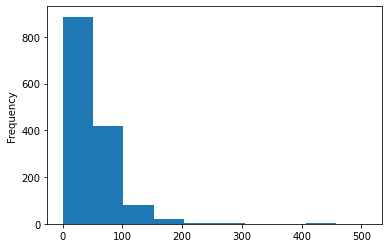

In [ ]:
#Checking if cube root transformation works for 'Product $', but the data still looks skewed, so didnt use this transformation here
np.cbrt(df_model['Product $']).plot.hist(bins = 10)
print((df_model['Product $']).value_counts())

Text(0.5, 0, 'Decision Time (Days)')

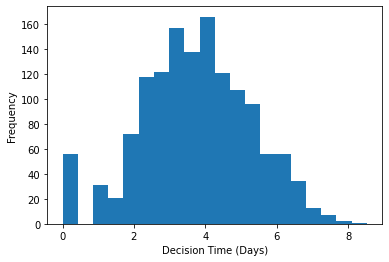

In [ ]:
#Using Cube root transformation for 'Decision Time'

df_model = df_model[df_model['Decision Time']>=0]
df_model['Decision Time'] = np.cbrt(df_model['Decision Time']) 
(df_model['Decision Time'][df_model['Decision Time']>=0]).plot.hist(bins = 20)
plt.xlabel('Decision Time (Days)')

In [ ]:
df_model['No of Stages'].describe()

count    1374.000000
mean        2.606987
std         0.946405
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: No of Stages, dtype: float64

count    1374.000000
mean       50.714303
std        61.282333
min         0.000000
25%        11.000000
50%        30.000000
75%        64.875000
max       435.000000
Name: Average Stage Transition Time, dtype: float64


Text(0.5, 0, 'Average Stage Transition Time (Days)')

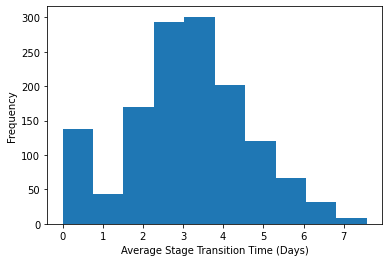

In [ ]:
#Using cube root transformation for 'Average Stage Transition Time'

print(df_model['Average Stage Transition Time'].describe())
df_model['Average Stage Transition Time'] = np.cbrt(df_model['Average Stage Transition Time'])
(df_model['Average Stage Transition Time']).plot.hist(bins = 10)
plt.xlabel('Average Stage Transition Time (Days)')


In [ ]:
#Dropping 'Creation Date', 'Decision Date', 'Opportunity ID', 'Product Status' columns
df_model.drop(['Creation Date', 'Decision Date', 'Opportunity ID', 'Product Status'], axis = 1, inplace = True)
(df_model.head())
df_model.shape

(1374, 14)

In [ ]:
df_model['Opportunity Type'].isnull().sum().sum()

0

In [ ]:
#Creating dependent variable df -> y and and independent variable df -> X for modelling

df_model.head()
y = df_model['Opportunity Status']
X = df_model.iloc[:,1:14]

In [ ]:
X.head()

,Opportunity Type,Core Consumption Market,Core Product Segment,Core Sales Segment,Geography,Core Product Application,Product $,Product Quantity,No of Stages,No of Products,Decision Time,Creation Month,Average Stage Transition Time
0,1,1,0,0,1,1,230400,1200,2,1,3.072317,2,2.758924
1,0,2,0,1,3,0,0,400000,5,5,5.687734,2,4.582828
2,0,2,0,1,1,1,1056000,3000,3,2,4.890973,2,3.825862
4,0,2,0,1,1,1,2000000,20000,3,2,5.646216,2,4.272659
5,1,2,0,0,0,2,281000,1000,2,1,2.410142,2,0.000000


In [ ]:
y.head()

0    1
1    1
2    1
4    1
5    1
Name: Opportunity Status, dtype: object

In [ ]:
y=y.astype('float')
X = X.astype('float')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
#Splitting into train test dataset with split ratio as 3:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(y_train.value_counts())
print(y_test.value_counts())

#Scaling the independent variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1.0    920
0.0    110
Name: Opportunity Status, dtype: int64
1.0    305
0.0     39
Name: Opportunity Status, dtype: int64


Confusion Matrix
[[  6  33]
 [  5 300]]
Accuracy Score = 0.89
              precision    recall  f1-score   support

         0.0       0.55      0.15      0.24        39
         1.0       0.90      0.98      0.94       305

    accuracy                           0.89       344
   macro avg       0.72      0.57      0.59       344
weighted avg       0.86      0.89      0.86       344

Feature:Opportunity Type,  Score: 0.23509
Feature:Core Consumption Market,  Score: 0.31931
Feature:Core Product Segment,  Score: -0.09653
Feature:Core Sales Segment,  Score: -0.29142
Feature:Geography,  Score: 0.13308
Feature:Core Product Application,  Score: -0.10189
Feature:Product $,  Score: 0.00969
Feature:Product Quantity,  Score: -0.10097
Feature:No of Stages,  Score: 0.75613
Feature:No of Products,  Score: 0.66948
Feature:Decision Time,  Score: -0.99327
Feature:Creation Month,  Score: -0.37968
Feature:Average Stage Transition Time,  Score: -0.05993


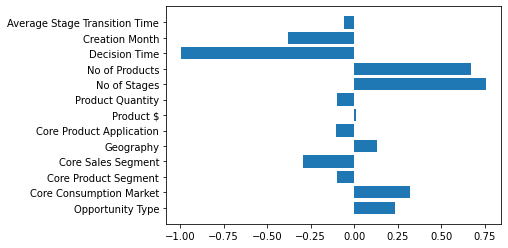

roc_auc_score = 0.72


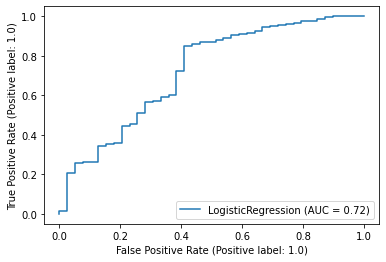

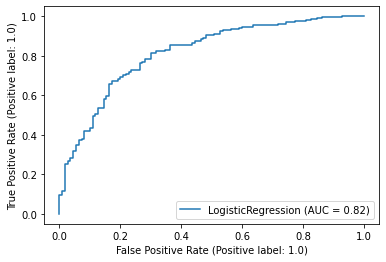

In [ ]:
##Using Logistic Regression Model

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_test = y_test.to_numpy()
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Confusion Matrix and model performance for test data
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)
print("Accuracy Score = %.2f"  %(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature:'+ X.columns[i] + ',  Score: %.5f' % (v))
# plot feature importance
plt.barh([x for x in (X.columns)], importance)
plt.show()

#ROC curve
print("roc_auc_score = %.2f"  % (roc_auc_score(y_test,classifier.predict_proba(X_test)[:, 1])))
plot_roc_curve(classifier, X_test, y_test )
plot_roc_curve(classifier, X_train, y_train )

In [ ]:
#Confusion matrix and model performance for train data 
y_train = y_train.to_numpy()
y_pred = classifier.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

print("Accuracy Score = %.2f"  %(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred))

[[ 16  94]
 [  7 913]]
Accuracy Score = 0.90
              precision    recall  f1-score   support

         0.0       0.70      0.15      0.24       110
         1.0       0.91      0.99      0.95       920

    accuracy                           0.90      1030
   macro avg       0.80      0.57      0.59      1030
weighted avg       0.88      0.90      0.87      1030



Confusion Matrix
[[ 13  26]
 [ 28 277]]
Accuracy Score = 0.84
              precision    recall  f1-score   support

         0.0       0.32      0.33      0.32        39
         1.0       0.91      0.91      0.91       305

    accuracy                           0.84       344
   macro avg       0.62      0.62      0.62       344
weighted avg       0.85      0.84      0.84       344

roc_auc_score = 0.62


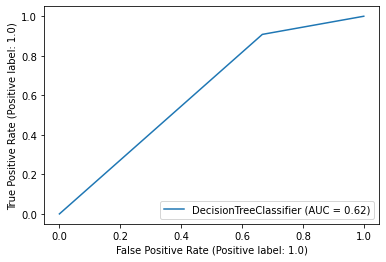

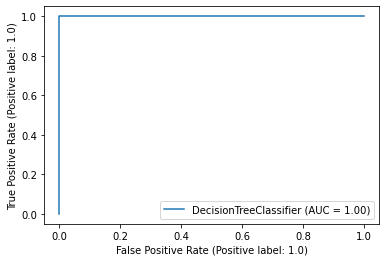

In [ ]:
## Using Decision tree classifier model

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Confusion matrix and model performance for test data
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)
print("Accuracy Score = %.2f"  %(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

#ROC curve
print("roc_auc_score = %.2f"  % (roc_auc_score(y_test,classifier.predict_proba(X_test)[:, 1])))
plot_roc_curve(classifier, X_test, y_test )
plot_roc_curve(classifier, X_train, y_train )

Confusion Matrix
[[  8  31]
 [ 10 295]]
Accuracy Score = 0.88
              precision    recall  f1-score   support

         0.0       0.44      0.21      0.28        39
         1.0       0.90      0.97      0.94       305

    accuracy                           0.88       344
   macro avg       0.67      0.59      0.61       344
weighted avg       0.85      0.88      0.86       344

roc_auc_score = 0.69


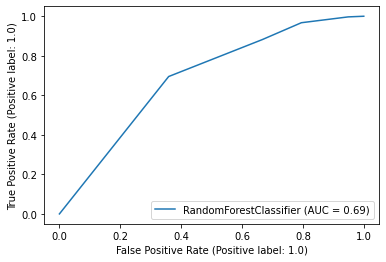

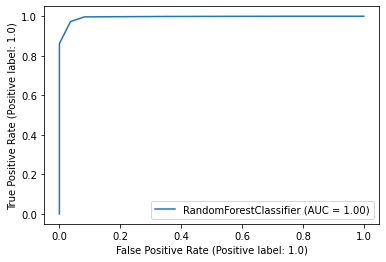

In [ ]:
## Using Random forest classifier model

classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Confusion matrix and model performance for test data
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)
print("Accuracy Score = %.2f"  %(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

#ROC curve
print("roc_auc_score = %.2f"  % (roc_auc_score(y_test,classifier.predict_proba(X_test)[:, 1])))
plot_roc_curve(classifier, X_test, y_test )
plot_roc_curve(classifier, X_train, y_train )

[12:03:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix
[[  9  30]
 [ 10 295]]
Accuracy Score = 0.88
              precision    recall  f1-score   support

         0.0       0.47      0.23      0.31        39
         1.0       0.91      0.97      0.94       305

    accuracy                           0.88       344
   macro avg       0.69      0.60      0.62       344
weighted avg       0.86      0.88      0.87       344

roc_auc_score = 0.75


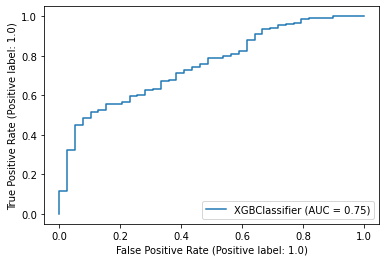

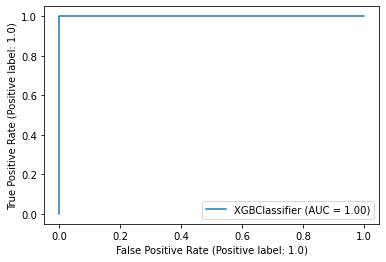

In [ ]:
#Using XG boost classifier model

classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Confusion matrix and model performance for test data
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)
print("Accuracy Score = %.2f"  %(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

#ROC curve
print("roc_auc_score = %.2f"  % (roc_auc_score(y_test,classifier.predict_proba(X_test)[:, 1])))
plot_roc_curve(classifier, X_test, y_test ) 
plot_roc_curve(classifier, X_train, y_train )

In [ ]:
#Confusion matrix and model performance for train data

#y_train = y_train.to_numpy()
y_pred = classifier.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

print("Accuracy Score = %.2f"  %(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred))

[[110   0]
 [  0 920]]
Accuracy Score = 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00       920

    accuracy                           1.00      1030
   macro avg       1.00      1.00      1.00      1030
weighted avg       1.00      1.00      1.00      1030



In [ ]:
#Feature Importance

feature_imp = pd.DataFrame()
feature_imp['Cols'] = X.columns
feature_imp['Feature Importance'] = classifier.feature_importances_
feature_imp = feature_imp.sort_values(by = 'Feature Importance', ascending = False)
feature_imp.reset_index(drop = True, inplace = True)
print(feature_imp)

                             Cols  Feature Importance
0            Core Product Segment            0.150750
1                  No of Products            0.104550
2                    No of Stages            0.092665
3              Core Sales Segment            0.078843
4   Average Stage Transition Time            0.077033
5                   Decision Time            0.075049
6        Core Product Application            0.072237
7                  Creation Month            0.071274
8                       Geography            0.070757
9                Opportunity Type            0.060790
10               Product Quantity            0.056598
11                      Product $            0.045593
12        Core Consumption Market            0.043862


In [ ]:
#Comparing won and loss line for Core Sales Segment

CPS_0 = df_model[df_model['Core Sales Segment'] == 0].groupby(['Core Sales Segment', 'Opportunity Status'])['Opportunity Type'].count()

CPS_1 = df_model[df_model['Core Sales Segment'] == 1].groupby(['Core Sales Segment', 'Opportunity Status'])['Opportunity Type'].count()
CPS_0 = CPS_0.append(CPS_1)
print(CPS_0)

Core Sales Segment  Opportunity Status
0                   0                       94
                    1                     1009
1                   0                       55
                    1                      216
Name: Opportunity Type, dtype: int64


Text(0.5, 1.0, 'Average Stage Transition Time Distribution for Loss Opportunities')

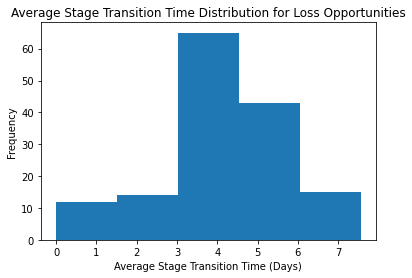

In [ ]:
#Comparing won and loss line for 'Average Stage Transition Time'

df_model[df_model['Opportunity Status']==0]['Average Stage Transition Time'].plot.hist(bins = 5)
plt.xlabel('Average Stage Transition Time (Days)')
plt.title('Average Stage Transition Time Distribution for Loss Opportunities')

Text(0.5, 1.0, 'Average Stage Transition Time Distribution for Won Opportunities')

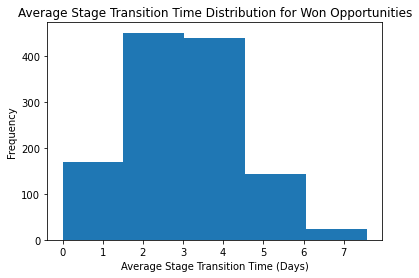

In [ ]:
df_model[df_model['Opportunity Status']==1]['Average Stage Transition Time'].plot.hist(bins = 5)
plt.xlabel('Average Stage Transition Time (Days)')
plt.title('Average Stage Transition Time Distribution for Won Opportunities')

Text(0.5, 1.0, 'Decision Time Distribution for Loss Opportunities')

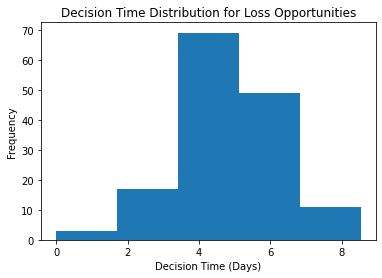

In [ ]:
#Comparing won and loss line for Decision Time

df_model[df_model['Opportunity Status']==0]['Decision Time'].plot.hist(bins = 5)
plt.xlabel('Decision Time (Days)')
plt.title('Decision Time Distribution for Loss Opportunities')

Text(0.5, 1.0, 'Decision Time Distribution for Won Opportunities')

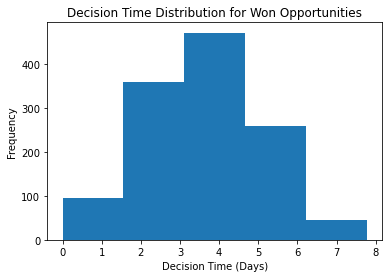

In [ ]:
df_model[df_model['Opportunity Status']==1]['Decision Time'].plot.hist(bins = 5)
plt.xlabel('Decision Time (Days)')
plt.title('Decision Time Distribution for Won Opportunities')

In [ ]:
#Comparing won and loss line for Geography

CPS_0 = df_model[df_model['Geography'] == 0].groupby(['Geography', 'Opportunity Status'])['Opportunity Type'].count()

CPS_1 = df_model[df_model['Geography'] == 1].groupby(['Geography', 'Opportunity Status'])['Opportunity Type'].count()
CPS_2 = df_model[df_model['Geography'] == 2].groupby(['Geography', 'Opportunity Status'])['Opportunity Type'].count()
CPS_3 = df_model[df_model['Geography'] == 3].groupby(['Geography', 'Opportunity Status'])['Opportunity Type'].count()
CPS_0 = CPS_0.append(CPS_1)
CPS_0 = CPS_0.append(CPS_2)
CPS_0 = CPS_0.append(CPS_3)
print(CPS_0)

Geography  Opportunity Status
0          0                      48
           1                     486
1          0                      55
           1                     439
2          0                      34
           1                     174
3          0                      12
           1                     126
Name: Opportunity Type, dtype: int64


## 